# 数据读取

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold,train_test_split 
import os
df = []
count = 0
get_dir = os.listdir("./")  
database = pd.read_csv("/datadrive/lzy/Data/BaseData.csv")
for i in range(0,27):
    cityname = database.iloc[i,0]
    print(cityname)
    count += 1
    if count > 1:
        dfx = pd.read_excel(cityname+"_Tableurban1.xlsx")
        print(dfx.shape)
        df = df.append(dfx,ignore_index=True)
    else:
        df = pd.read_excel(cityname+"_Tableurban1.xlsx")
        print(len(df))
df.fillna(0,inplace=True)
df.info()
df.head()#看前五行
#print(df)
print(df.shape)

ALi
77
BaiShan
(172, 23)
BeiJing
(10806, 23)
ChengDu
(2823, 23)
ChongQing
(2122, 23)
FangChengGang
(384, 23)
GuangZhou
(3371, 23)
HaErBin
(4278, 23)
HaiKou
(879, 23)
HeZhou
(306, 23)
JiLin
(621, 23)
JiuQuan
(2456, 23)
LaSa
(1921, 23)
LinYi
(1798, 23)
MuDanJiang
(254, 23)
NuJiangZhou
(110, 23)
QiQiHaEr
(669, 23)
ShangHai
(7514, 23)
ShenZhen
(2208, 23)
TianMen
(358, 23)
TuLuFan
(273, 23)
WuHan
(3646, 23)
XiAn
(1850, 23)
YaAn
(332, 23)
YuLin
(964, 23)
ZhanJiang
(950, 23)
ZhaoTong
(410, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51552 entries, 0 to 51551
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    51552 non-null  int64  
 1   ID            51552 non-null  int64  
 2   PV17_weigh    51552 non-null  float64
 3   DEM_MEAN      51552 non-null  float64
 4   NDBI_MEAN     51552 non-null  float64
 5   NDVI_MEAN     51552 non-null  float64
 6   Slope_MEAN    51552 non-null  float64
 7   Road_De

In [8]:
test_df = df.iloc[:,[1,15,7,16,12,11,3,4,5,6,17,18,21,22,2]]
def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std()+2)#特征缩放

def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    #data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones,df.iloc[:,1:-1]],axis=1)
    return data


def get_y(df):#读取标签
#     '''assume the last column is the target'''

    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列

X = get_X(test_df)
X.info()
print(X.shape, type(X))
# print(X)

y = get_y(test_df)
print(y.shape, type(y))
print(y)
#看下数据维度

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51552 entries, 0 to 51551
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ones          51552 non-null  float64
 1   yCentroid     51552 non-null  float64
 2   Road_Density  51552 non-null  float64
 3   cloudy        51552 non-null  float64
 4   RfClass_num   51552 non-null  float64
 5   EorS          51552 non-null  float64
 6   DEM_MEAN      51552 non-null  float64
 7   NDBI_MEAN     51552 non-null  float64
 8   NDVI_MEAN     51552 non-null  float64
 9   Slope_MEAN    51552 non-null  float64
 10  GDP           51552 non-null  float64
 11  population    51552 non-null  float64
 12  secondin      51552 non-null  float64
 13  vehicle       51552 non-null  float64
dtypes: float64(14)
memory usage: 5.5 MB
(51552, 14) <class 'pandas.core.frame.DataFrame'>
(51552,) <class 'numpy.ndarray'>
[     0.            0.            0.       ... 247622.466856      0.
      0.  

# 数据标准化

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std_X = MinMaxScaler((0,10))
std_y = y.reshape(-1,1)
std_y = MinMaxScaler((0,10))

X_std = std_X.fit_transform(X)
y_std = std_y.fit_transform(y.reshape(-1,1))
X_train = std_X.fit_transform(X_train)
X_test = std_X.transform(X_test)
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))
print(X.shape, type(X))
print(y.shape, type(y))
print(y_std)
print(y_test,y_train)
# print(X_train,X_test)
# y_train.astype('int')

(36086, 14) (36086,)
(15466, 14) (15466,)
(51552, 14) <class 'pandas.core.frame.DataFrame'>
(51552,) <class 'numpy.ndarray'>
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.18268578]
 [0.        ]
 [0.        ]]
[[1.08993921]
 [0.        ]
 [0.15029928]
 ...
 [0.38511792]
 [0.97937477]
 [2.04444635]] [[0.        ]
 [0.        ]
 [2.18915026]
 ...
 [0.        ]
 [2.1318104 ]
 [0.33346063]]


# 线性回归

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score # not for continous data
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
MAE=[]
R2=[]
EVS =[]
MSE=[]

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, Y_pred)
evs = explained_variance_score(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
#     print(pls2.y_scores_)
#     print(Y_pred)
#     print(y_test)
r2 = r2_score(y_test,Y_pred);
MAE.append(mae)
R2.append(r2)
EVS.append(evs)
MSE.append(mse)
print(MAE,R2,EVS,MSE)
print(lr.coef_)
a = lr.get_params()
#交叉验证
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.390186132077245] [0.622116301293118] [0.6221613769373032] [0.36036680364437884]
[[ 0.00000000e+00  4.57469820e-04  7.99719327e-01 -1.76426891e-02
  -6.36665838e-03  2.24764808e-03  3.76925619e-02  2.04995663e-03
  -1.48488733e-02 -5.78001190e-02  1.91342555e-02 -5.32365857e-02
   5.43074880e-03  2.81886889e-02]]
[0.63532894 0.62844076 0.64726775 0.64182889 0.63018066 0.66886952
 0.64176269 0.62772632 0.63834573 0.6292528 ]
Accuracy: 0.64 (+/- 0.02)


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score # not for continous data
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
MAE=[]
R2=[]
EVS =[]
MSE=[]

X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=0.3, random_state=0)
lro = linear_model.LinearRegression()
lro.fit(X_train1, y_train1)
Y_pred = lro.predict(X_test1)
mae = mean_absolute_error(y_test1, Y_pred)
evs = explained_variance_score(y_test1, Y_pred)
mse = mean_squared_error(y_test1, Y_pred)
#     print(pls2.y_scores_)
#     print(Y_pred)
#     print(y_test)
r2 = r2_score(y_test1,Y_pred);
MAE.append(mae)
R2.append(r2)
EVS.append(evs)
MSE.append(mse)
print(MAE,R2,EVS,MSE)
print(lro.coef_)
a = lro.get_params()
#交叉验证
scores = cross_val_score(lro, X_train1, y_train1, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[528879.9784687777] [0.6221163012931172] [0.6221613769373024] [662087473465.1163]
[ 0.00000000e+00  1.27882536e+02  2.94080455e+02 -4.96138625e+05
 -2.05469590e+03  1.52329359e+04  9.71453191e+01  1.54740129e+04
 -1.56485297e+05 -1.87411607e+04  6.80851815e+00 -2.31882016e+02
  1.20136215e+05  5.88729064e+02]
[0.63532894 0.62844076 0.64726775 0.64182889 0.63018066 0.66886952
 0.64176269 0.62772632 0.63834573 0.6292528 ]
Accuracy: 0.64 (+/- 0.02)


# 参数显著性

In [72]:
import statsmodels.api as sm
results = sm.OLS(y_train1, X_train1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4916.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:59:54   Log-Likelihood:            -5.4183e+05
No. Observations:               36086   AIC:                         1.084e+06
Df Residuals:                   36072   BIC:                         1.084e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ones          3.189e+05   7.27e+04      4.388   

In [71]:
import statsmodels.api as sm
from scipy import stats
lm = linear_model.LinearRegression()
lm.fit(X_train1, y_train1)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_test1)

newX = pd.DataFrame({"Constant":np.ones(len(X_test1))}).join(pd.DataFrame(X_test1))
MSE = (sum((y_test1-predictions)**2))/(len(X_test1)-len(X_test1.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

# sse = np.sum((predictions - y_test1) ** 2, axis=0) / float(X_test1.shape[0] - X_test1.shape[1])
# se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X_test1.T, X_test1))))for i in range(X_test1.shape[1])])
# t_value = lm.coef_ / se
# p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), y_test1.shape[0] - X_test1.shape[1]))

# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.iloc[0:])))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,t_value,p_values]
print(myDF3)

ValueError: diag requires an array of at least two dimensions

In [24]:
# y_pred = lr.predict(X_std)
predict_inverse = std_y.inverse_transform(y_pred)
# predict_inverse = Y_pred
print(predict_inverse.shape)
print(y.shape)
y = y.reshape(-1,1)
output = np.hstack((y,predict_inverse))
output= pd.DataFrame(output)
al = output.iloc[0:77,:]
bs = output.iloc[77:249,:]
bj = output.iloc[249:11055,:]
cd = output.iloc[11055:13878,:]
cq = output.iloc[13878:16000,:]
fcg = output.iloc[16000:16384,:]
gz = output.iloc[16384:19755,:]
heb = output.iloc[19755:24033,:]
hk = output.iloc[24033:24912,:]
hz = output.iloc[24912:25218,:]
jl = output.iloc[25218:25839,:]
jq = output.iloc[25839:28295,:]
ls = output.iloc[28295:30216,:]
ly = output.iloc[30216:32014,:]
mdj = output.iloc[32014:32268,:]
njz = output.iloc[32268:32378,:]
qqhe = output.iloc[32378:33047,:]
sh = output.iloc[33047:40561,:]
sz = output.iloc[40561:42769,:]
tm = output.iloc[42769:43127,:]
tlf = output.iloc[43127:43400,:]
wh = output.iloc[43400:47046,:]
xa = output.iloc[47046:48896,:]
ya = output.iloc[48896:49228,:]
yl = output.iloc[49228:50192,:]
zj = output.iloc[50192:51142,:]
zt = output.iloc[51142:51552,:]
lowlat = pd.concat([cq,fcg,gz,hk,hz,njz,sz,zj,zt], axis = 0, join='outer', sort=False)
midlat = pd.concat([al,cd,ls,ly,sh,tm,wh,xa,ya], axis = 0, join='outer', sort=False)
highlat = pd.concat([bs,bj,heb,jl,jq,mdj,qqhe,tlf,yl], axis = 0, join='outer', sort=False)
lowsample = lowlat.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)
midsample = midlat.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)
highsample = highlat.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)
alldata =  np.vstack((lowsample,midsample,highsample))
alldata=np.array(alldata)

(51552, 1)
(51552, 1)


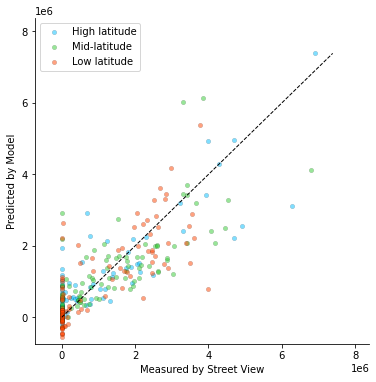

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.scatter(highsample.iloc[:,0], highsample.iloc[:,1], edgecolors=(0, 0, 0),s=20,c = 'deepskyblue',marker = 'o',linewidths = 0.2,alpha = 0.5,label = "High latitude")
ax.scatter(midsample.iloc[:,0], midsample.iloc[:,1], edgecolors=(0, 0, 0),s=20,c = 'limegreen',marker = 'o',linewidths = 0.2,alpha = 0.5,label = "Mid-latitude")
ax.scatter(lowsample.iloc[:,0], lowsample.iloc[:,1], edgecolors=(0, 0, 0),s=20,c = 'orangered',marker = 'o',linewidths = 0.2,alpha = 0.5,label = "Low latitude")
ax.plot([0, alldata[:,1].max()], [0, alldata[:,1].max()], 'k--', lw=1)
ax.set_xlabel('Measured by Street View')
ax.set_ylabel('Predicted by Model')
ax.set_xlim([alldata[:,1].min()-200000, alldata[:,1].max()+1000000])
ax.set_ylim([alldata[:,1].min()-200000, alldata[:,1].max()+1000000])
plt.legend(loc = 'upper left')
fig = plt.gcf()
fig.savefig('lr_new.png', dpi=600)
plt.show()

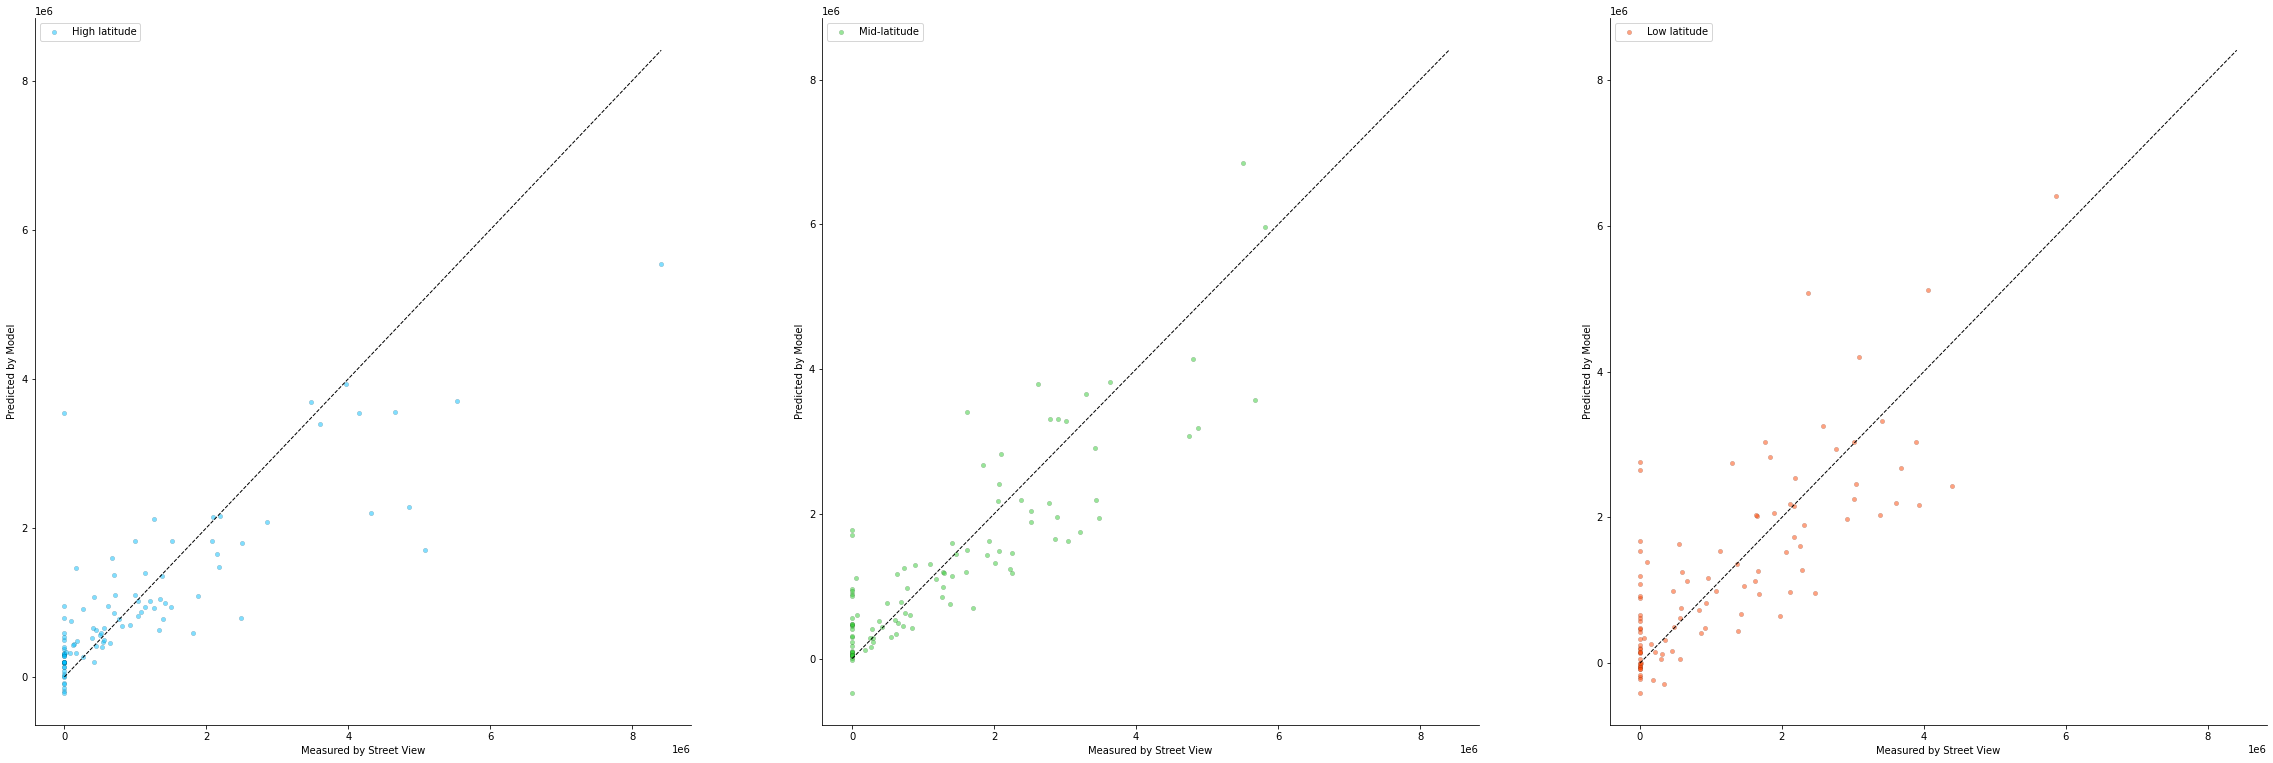

In [60]:
fig, ax = plt.subplots(1,3,figsize=(40,13))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[0].scatter(highsample.iloc[:,0], highsample.iloc[:,1], edgecolors=(0, 0, 0),s=20,c = 'deepskyblue',marker = 'o',linewidths = 0.2,alpha = 0.5,label = "High latitude")
# plt.legend(loc = 'upper left')
ax[1].scatter(midsample.iloc[:,0], midsample.iloc[:,1], edgecolors=(0, 0, 0),s=20,c = 'limegreen',marker = 'o',linewidths = 0.2,alpha = 0.5,label = "Mid-latitude")
ax[2].scatter(lowsample.iloc[:,0], lowsample.iloc[:,1], edgecolors=(0, 0, 0),s=20,c = 'orangered',marker = 'o',linewidths = 0.2,alpha = 0.5,label = "Low latitude")
ax[0].plot([alldata[:,0].min(), alldata[:,0].max()], [alldata[:,0].min(), alldata[:,0].max()], 'k--', lw=1)
ax[1].plot([alldata[:,0].min(), alldata[:,0].max()], [alldata[:,0].min(), alldata[:,0].max()], 'k--', lw=1)
ax[2].plot([alldata[:,0].min(), alldata[:,0].max()], [alldata[:,0].min(), alldata[:,0].max()], 'k--', lw=1)
ax[0].set_xlabel('Measured by Street View')
ax[0].set_ylabel('Predicted by Model')
ax[1].set_xlabel('Measured by Street View')
ax[1].set_ylabel('Predicted by Model')
ax[2].set_xlabel('Measured by Street View')
ax[2].set_ylabel('Predicted by Model')
ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')
ax[2].legend(loc = 'upper left')
fig = plt.gcf()
fig.savefig('3lr.png', dpi=600)
plt.show()

In [62]:
ID = np.array(test_df.iloc[:,0])
ID =ID.reshape(-1,1)
output = np.hstack((ID,output))
output= pd.DataFrame(output)
output.iloc[0:77,:].to_csv('al_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[77:249,:].to_csv('bs_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[249:11055,:].to_csv('bj_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[11055:13878,:].to_csv('cd_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[13878:16000,:].to_csv('cq_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[16000:16384,:].to_csv('fcg_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[16384:19755,:].to_csv('gz_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[19755:24033,:].to_csv('heb_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[24033:24912,:].to_csv('hk_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[24912:25218,:].to_csv('hz_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[25218:25839,:].to_csv('jl_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[25839:28295,:].to_csv('jq_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[28295:30216,:].to_csv('ls_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[30216:32014,:].to_csv('ly_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[32014:32268,:].to_csv('mdj_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[32268:32378,:].to_csv('njz_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[32378:33047,:].to_csv('qqhe_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[33047:40561,:].to_csv('sh_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[40561:42769,:].to_csv('sz_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[42769:43127,:].to_csv('tm_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[43127:43400,:].to_csv('tlf_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[43400:47046,:].to_csv('wh_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[47046:48896,:].to_csv('xa_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[48896:49228,:].to_csv('ya_lrpred.csv',header = ["Id","y","Prediction"]) 
output.iloc[49228:50192,:].to_csv('yl_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[50192:51142,:].to_csv('zj_lrpred.csv',header = ["Id","y","Prediction"])
output.iloc[51142:51552,:].to_csv('zt_lrpred.csv',header = ["Id","y","Prediction"])

# 中低高纬抽样误差

NameError: name 'maem' is not defined

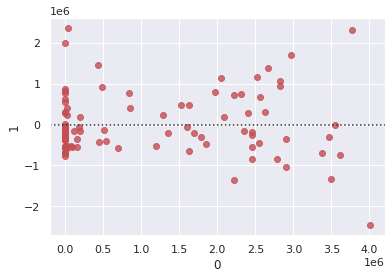

In [28]:
outputall = pd.concat([test_df.iloc[:,1],output],axis = 1)
# # figure,axes=plt.subplots() #得到画板、轴
# mael = lowlat.iloc[:,1]-lowlat.iloc[:,0]
# maem = midlat.iloc[:,1]-midlat.iloc[:,0]
# maeh = highlat.iloc[:,1]-highlat.iloc[:,0]
# mael = lowsample.iloc[:,1]-lowsample.iloc[:,0]
# maem = midsample.iloc[:,1]-midsample.iloc[:,0]
# maeh = highsample.iloc[:,1]-highsample.iloc[:,0]

# alldata = pd.concat([mael,maem,maeh],axis = 1)
# axes.boxplot(mael,patch_artist=True) #描点上色
# axes.boxplot(maem,patch_artist=True) #描点上色
# axes.boxplot(maeh,patch_artist=True) #描点上色
# plt.show() #展示
# num = np.arange(len(mael))
# mael = np.vstack((num,pd.DataFrame(mael).iloc[:,0]))
# mael.columns.name = 'mae'

import seaborn as sns
sns.set(color_codes=True)
# anscombe = sns.load_dataset("anscombe")

sns.residplot(x=lowsample.iloc[:,0], y=lowsample.iloc[:,1],color = 'r')
num = np.arange(len(maem))
maem = np.vstack((num,pd.DataFrame(maem).iloc[:,0]))
sns.residplot(x=midsample.iloc[:,0], y=midsample.iloc[:,1],color = 'g')
num = np.arange(len(maeh))
maeh = np.vstack((num,pd.DataFrame(maeh).iloc[:,0]))
sns.residplot(x=highsample.iloc[:,0], y=highsample.iloc[:,1],color = 'b')

<AxesSubplot:>

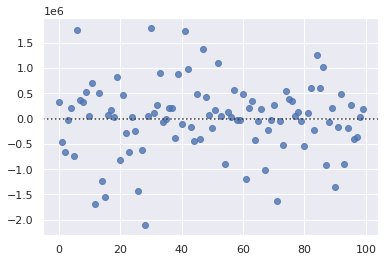

In [139]:
num = np.arange(len(maem))
maem = np.vstack((num,pd.DataFrame(maem).iloc[:,0]))
sns.residplot(x=maem[0], y=maem[1])

<AxesSubplot:>

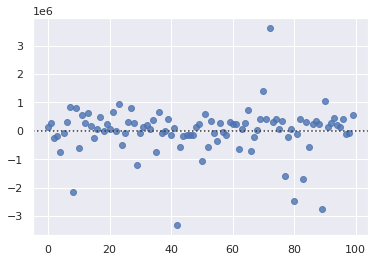

In [140]:
num = np.arange(len(maeh))
maeh = np.vstack((num,pd.DataFrame(maeh).iloc[:,0]))
sns.residplot(x=maeh[0], y=maeh[1])

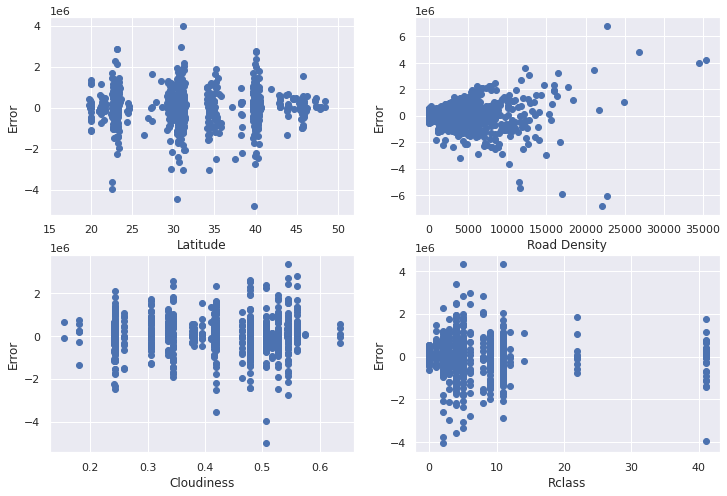

In [38]:
outputall = pd.concat([test_df.iloc[:,1],output],axis = 1)
test = outputall.sample(n=1000, frac=None, replace=False, weights=None, random_state=None, axis=0)
figure,axes=plt.subplots(2,2,figsize=(12,8))
axes[0,0].scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes[0,0].set_xlabel('Latitude')
axes[0,0].set_ylabel('Error')
axes[0,0].set_xlim(15,52)
outputall = pd.concat([test_df.iloc[:,2],output],axis = 1)#RoadDensity
test = outputall.sample(n=1000, frac=None, replace=False, weights=None, random_state=None, axis=0)
# figure,axes=plt.subplots()
axes[0,1].scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes[0,1].set_xlabel('Road Density')
axes[0,1].set_ylabel('Error')
outputall = pd.concat([test_df.iloc[:,3],output],axis = 1)#cloudy
test = outputall.sample(n=1000, frac=None, replace=False, weights=None, random_state=None, axis=0)
# figure,axes=plt.subplots()
axes[1,0].scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes[1,0].set_xlabel('Cloudiness')
axes[1,0].set_ylabel('Error')
outputall = pd.concat([test_df.iloc[:,4],output],axis = 1)#Rclass
test = outputall.sample(n=1000, frac=None, replace=False, weights=None, random_state=None, axis=0)
# figure,axes=plt.subplots()
axes[1,1].scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes[1,1].set_xlabel('Rclass')
axes[1,1].set_ylabel('Error')
fig = plt.gcf()
fig.savefig('errors_8.png', dpi=600)
plt.show()

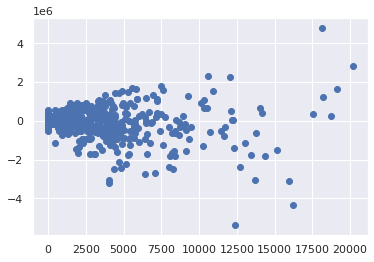

In [21]:
outputall = pd.concat([test_df.iloc[:,2],output],axis = 1)#RoadDensity
test = outputall.sample(n=500, frac=None, replace=False, weights=None, random_state=None, axis=0)
figure,axes=plt.subplots()
axes.scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes.set_xlabel('Road Density')
axes.set_ylabel('Error')

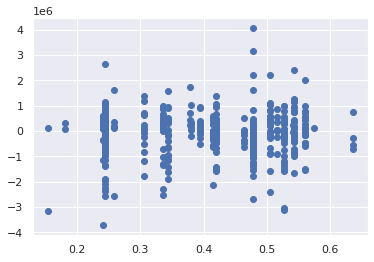

In [22]:
outputall = pd.concat([test_df.iloc[:,3],output],axis = 1)#cloudy
test = outputall.sample(n=500, frac=None, replace=False, weights=None, random_state=None, axis=0)
figure,axes=plt.subplots()
axes.scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes.set_xlabel('Cloudiness')
axes.set_ylabel('Error')

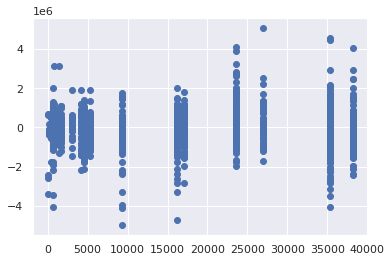

In [26]:
outputall = pd.concat([test_df.iloc[:,10],output],axis = 1)#GDP
test = outputall.sample(n=2000, frac=None, replace=False, weights=None, random_state=None, axis=0)
figure,axes=plt.subplots()
axes.scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes.set_xlabel('GDP')
axes.set_ylabel('Error')

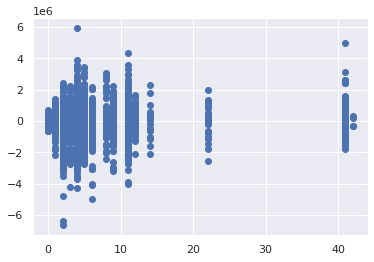

In [29]:
outputall = pd.concat([test_df.iloc[:,4],output],axis = 1)#Rclass
test = outputall.sample(n=5000, frac=None, replace=False, weights=None, random_state=None, axis=0)
figure,axes=plt.subplots()
axes.scatter(x=test.iloc[:,0], y=(test.iloc[:,2]-test.iloc[:,1]))
axes.set_xlabel('Rclass')
axes.set_ylabel('Error')

In [22]:

aln = int(540*(77/51552))
bsn = int(540*(172/51552))
bjn = int(540*(10806/51552))
cdn = int(540*(2823/51552))
cqn = int(540*(2122/51552))
fcgn = int(540*(384/51552))
gzn = int(540*(3371/51552))
hebn = int(540*(4278/51552))
hkn = int(540*(879/51552))
hzn = int(540*(306/51552))
jln = int(540*(621/51552))
jqn = int(540*(2456/51552))
lsn = int(540*(1921/51552))
lyn = int(540*(1798/51552))
mdjn = int(540*(254/51552))
njzn = int(540*(110/51552))
qqhen = int(540*(669/51552))
shn = int(540*(7514/51552))
szn = int(540*(2208/51552))
tmn = int(540*(358/51552))
tlfn = int(540*(273/51552))
whn = int(540*(3646/51552))
xan = int(540*(1850/51552))
yan = int(540*(332/51552))
yln = int(540*(964/51552))
zjn = int(540*(950/51552))
ztn = int(540*(410/51552))
print(aln,bsn,bjn,cdn,cqn,fcgn,gzn,hebn,hkn,hzn,jln,jqn,lsn,lyn,mdjn,njzn,qqhen,shn,szn,tmn,tlfn,whn,xan,yan,yln,zjn,ztn)
allnum = aln+bsn+bjn+cdn+cqn+fcgn+gzn+hebn+hkn+hzn+jln+jqn+lsn+lyn+mdjn+njzn+qqhen+shn+szn+tmn+tlfn+whn+xan+yan+yln+zjn+ztn
print(allnum)
al = output.iloc[0:77,:].sample(n=aln, frac=None, replace=False, weights=None, random_state=None, axis=0)
bs = output.iloc[77:249,:].sample(n=bsn, frac=None, replace=False, weights=None, random_state=None, axis=0)
bj = output.iloc[249:11055,:].sample(n=bjn, frac=None, replace=False, weights=None, random_state=None, axis=0)
cd = output.iloc[11055:13878,:].sample(n=cdn, frac=None, replace=False, weights=None, random_state=None, axis=0)
cq = output.iloc[13878:16000,:].sample(n=cqn, frac=None, replace=False, weights=None, random_state=None, axis=0)
fcg = output.iloc[16000:16384,:].sample(n=fcgn, frac=None, replace=False, weights=None, random_state=None, axis=0)
gz = output.iloc[16384:19755,:].sample(n=gzn, frac=None, replace=False, weights=None, random_state=None, axis=0)
heb = output.iloc[19755:24033,:].sample(n=hebn, frac=None, replace=False, weights=None, random_state=None, axis=0)
hk = output.iloc[24033:24912,:].sample(n=hkn, frac=None, replace=False, weights=None, random_state=None, axis=0)
hz = output.iloc[24912:25218,:].sample(n=hzn, frac=None, replace=False, weights=None, random_state=None, axis=0)
jl = output.iloc[25218:25839,:].sample(n=jln, frac=None, replace=False, weights=None, random_state=None, axis=0)
jq = output.iloc[25839:28295,:].sample(n=jqn, frac=None, replace=False, weights=None, random_state=None, axis=0)
ls = output.iloc[28295:30216,:].sample(n=lsn, frac=None, replace=False, weights=None, random_state=None, axis=0)
ly = output.iloc[30216:32014,:].sample(n=lyn, frac=None, replace=False, weights=None, random_state=None, axis=0)
mdj = output.iloc[32014:32268,:].sample(n=mdjn, frac=None, replace=False, weights=None, random_state=None, axis=0)
njz = output.iloc[32268:32378,:].sample(n=njzn, frac=None, replace=False, weights=None, random_state=None, axis=0)
qqhe = output.iloc[32378:33047,:].sample(n=qqhen, frac=None, replace=False, weights=None, random_state=None, axis=0)
sh = output.iloc[33047:40561,:].sample(n=shn, frac=None, replace=False, weights=None, random_state=None, axis=0)
sz = output.iloc[40561:42769,:].sample(n=szn, frac=None, replace=False, weights=None, random_state=None, axis=0)
tm = output.iloc[42769:43127,:].sample(n=tmn, frac=None, replace=False, weights=None, random_state=None, axis=0)
tlf = output.iloc[43127:43400,:].sample(n=tlfn, frac=None, replace=False, weights=None, random_state=None, axis=0)
wh = output.iloc[43400:47046,:].sample(n=whn, frac=None, replace=False, weights=None, random_state=None, axis=0)
xa = output.iloc[47046:48896,:].sample(n=xan, frac=None, replace=False, weights=None, random_state=None, axis=0)
ya = output.iloc[48896:49228,:].sample(n=yan, frac=None, replace=False, weights=None, random_state=None, axis=0)
yl = output.iloc[49228:50192,:].sample(n=yln, frac=None, replace=False, weights=None, random_state=None, axis=0)
zj = output.iloc[50192:51142,:].sample(n=zjn, frac=None, replace=False, weights=None, random_state=None, axis=0)
zt = output.iloc[51142:51552,:].sample(n=ztn, frac=None, replace=False, weights=None, random_state=None, axis=0)

(51552, 1)
(51552, 1)
0 1 113 29 22 4 35 44 9 3 6 25 20 18 2 1 7 78 23 3 2 38 19 3 10 9 4
528


In [30]:
output

,0,1
0,0.000000e+00,6.474258e+05
1,0.000000e+00,5.964694e+05
2,0.000000e+00,1.023559e+06
3,0.000000e+00,9.373856e+05
4,0.000000e+00,6.018582e+05
...,...,...
51547,3.692378e+06,1.591696e+06
51548,0.000000e+00,3.316192e+05
51549,2.476225e+05,2.329179e+05
51550,0.000000e+00,-3.852421e+05


In [39]:
Num = [0,77,249,11055,13878,16000,16384,19755,24033,
       24912,25218,25839,28295,30216,32014,32268,32378,33047,
       40561,42769,43127,43400,47046,48896,49228,50192,51142,51552]
PV_Pred = []
database = pd.read_csv("/datadrive/lzy/Data/BaseData.csv")
for i in range(0,27):
    output[output < 0] = 0
    PV_Pred.append(output.iloc[Num[i]:Num[i+1],1].sum())
database_new = pd.concat([database,pd.DataFrame(PV_Pred)],axis = 1)

In [40]:
database_new.rename(columns={'0':'PV_T_Pred'},inplace=True)

In [44]:
database_new.to_csv("databasepred.csv",index = False)

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score # not for continous data
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
MAE=[]
R2=[]
EVS =[]
MSE=[]

lr1 = linear_model.LinearRegression()
lr1.fit(X, y)
Y_pred = lr.predict(X)
mae = mean_absolute_error(y, Y_pred)
evs = explained_variance_score(y, Y_pred)
mse = mean_squared_error(y, Y_pred)
#     print(pls2.y_scores_)
#     print(Y_pred)
#     print(y_test)
r2 = r2_score(y,Y_pred);
MAE.append(mae)
R2.append(r2)
EVS.append(evs)
MSE.append(mse)
print(MAE,R2,EVS,MSE)
print(lr1.coef_)
a = lr1.get_params()
#交叉验证
scores = cross_val_score(lr1, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[996766.7383026128] [-0.5550161841332351] [0.003433716161345579] [2762248934615.399]
[[ 0.00000000e+00 -2.94493084e+02  2.91418481e+02 -5.10811732e+05
  -1.71523925e+03  1.58507020e+04  9.25832256e+01  1.13641775e+04
  -1.61193465e+05 -1.90172414e+04  6.64271028e+00 -2.38996585e+02
   9.91922713e+04  6.15784780e+02]]
[0.60567505 0.65233809 0.64243022 0.55299579 0.69801954 0.54268587
 0.62286457 0.60938886 0.64671938 0.58862436]
Accuracy: 0.62 (+/- 0.09)


In [46]:
lr.coef_

array([[ 0.00000000e+00,  4.57469820e-04,  7.99719327e-01,
        -1.76426891e-02, -6.36665838e-03,  2.24764808e-03,
         3.76925619e-02,  2.04995663e-03, -1.48488733e-02,
        -5.78001190e-02,  1.91342555e-02, -5.32365857e-02,
         5.43074880e-03,  2.81886889e-02]])